## **Algoritmo di Deutsch**

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.1 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np

In [3]:
n_bits = 2
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def deutsch(f_values):
    """
    Apply the Deutsch algorithm given a one-qubit function f(x)

    Args:
        f_values (list[int]): values [f(0), f(1)]

    Returns:
        array[float], array[float]: the measurement probabilities on the first qubit, state
    """

    qml.PauliX([1])
    qml.Hadamard([0])
    qml.Hadamard([1])

    qml.Barrier([0,1])

    index = np.ravel_multi_index(f_values, [2]*len(f_values))

    if index==0:
        pass

    elif index==1:
        qml.CNOT([0,1])

    elif index==2:
        qml.PauliX([0])
        qml.CNOT([0,1])
        qml.PauliX([0])

    elif index==3:
        qml.PauliX([1])

    else:
        print('Incorrect input')

    qml.Barrier([0,1])

    qml.Hadamard([0])

    return qml.probs([0]), qml.state()


probs of |0> and |1> on the first qubit = [1. 0.]
state = [-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
The function is constant


(<Figure size 900x300 with 1 Axes>, <Axes: >)

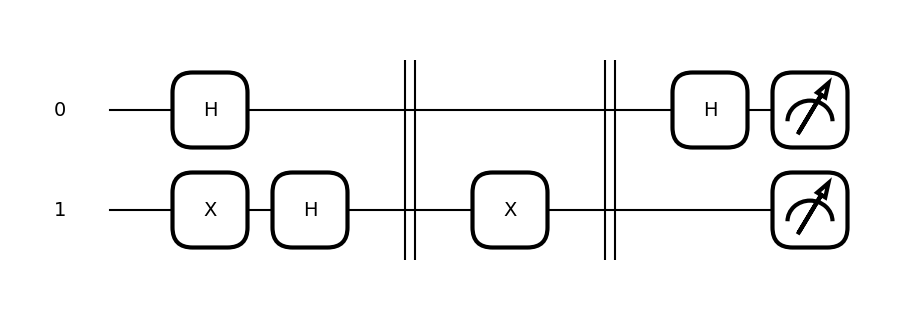

In [ ]:
f_values=[1,1]

probs, state = deutsch(f_values)
print("probs of |0> and |1> on the first qubit = "+str(probs))
print("state = "+str(state))
if probs[0] > 0.99:
    print("The function is constant")
else:
    print("The function is balanced")
qml.draw_mpl(deutsch)(f_values)

# **Algoritmo Deutsch Jozsa**

Tipo di funzione generata: costante
f(x) = 1 per ogni x

Risultato della misura: [0 0 0 0]
Funzione costante.


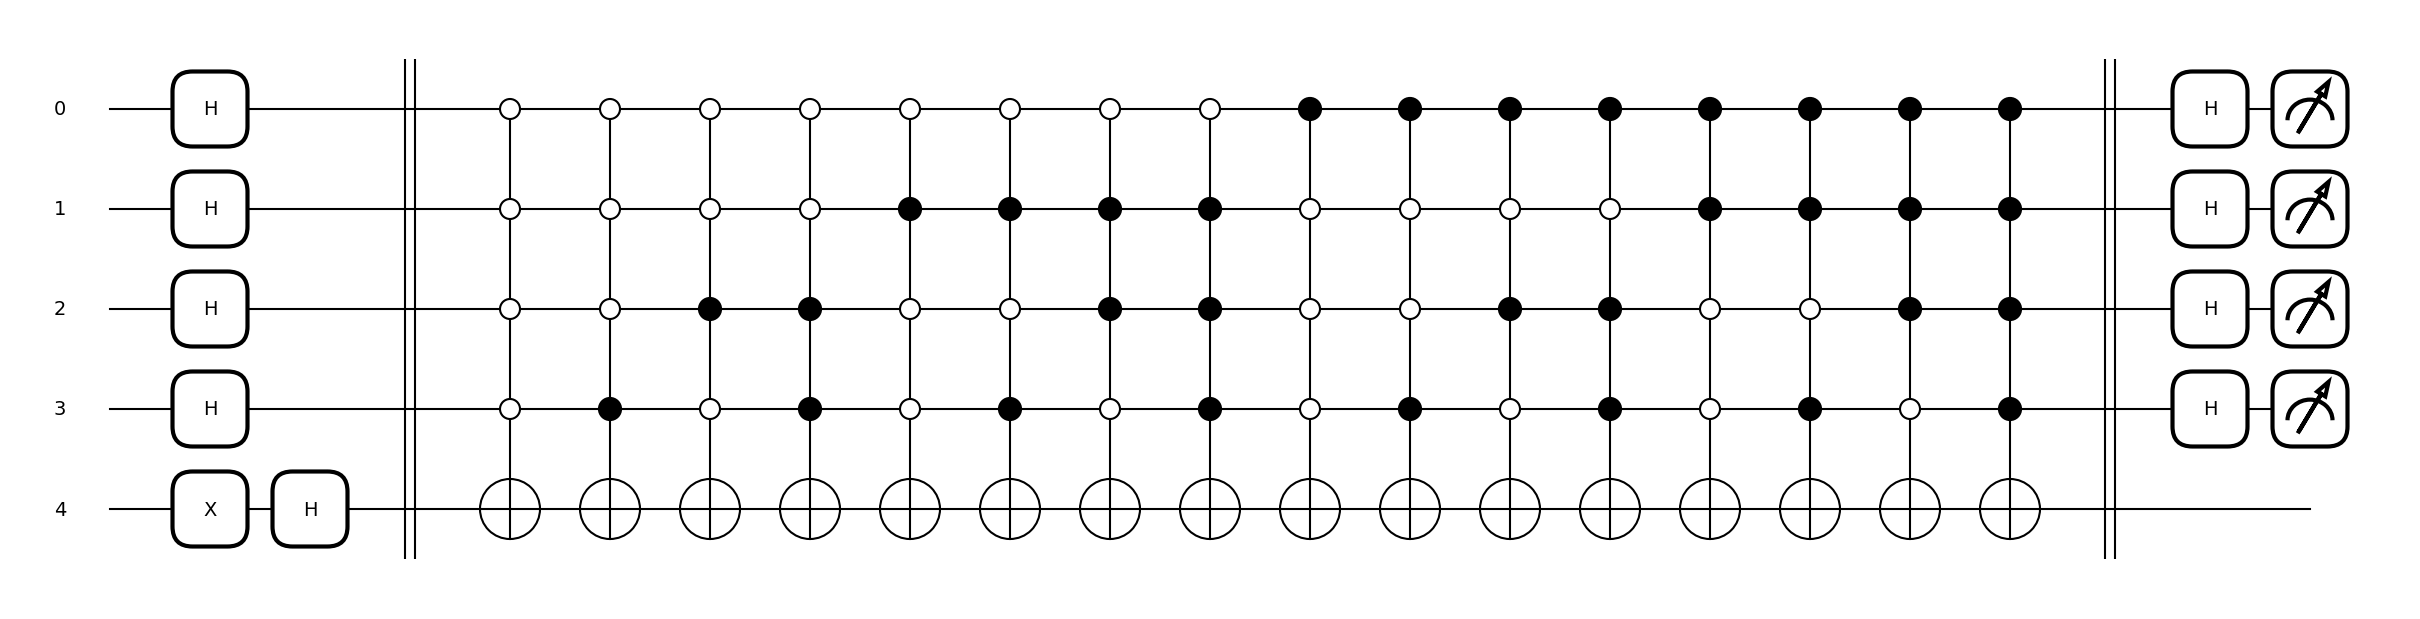

In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import itertools
import random


n = 4 #int(input("Inserisci il numero di qubit di input (n ≥ 1): "))

#generiamo tutte le possibili combinazioni
input_strings = list(itertools.product([0, 1], repeat=n))

#randomicamente scegliamo la funzione: costante o bilanciata
funzione_tipo = random.choice(["costante", "bilanciata"])
print(f"Tipo di funzione generata: {funzione_tipo}")

#generazione dinamica della funzione f
if funzione_tipo == "costante":
    costante = random.choice([0, 1])
    def f(x):
        return costante
    print(f"f(x) = {costante} per ogni x")
else:  #bilanciata
    half = len(input_strings) // 2
    ones_indices = random.sample(range(len(input_strings)), half)
    def f(x):
        idx = input_strings.index(tuple(x))
        return 1 if idx in ones_indices else 0
    print("Valori della funzione bilanciata:")
    for i, x in enumerate(input_strings):
        print(f"f({x}) = {1 if i in ones_indices else 0}")

#dispositivo quantistico simulato
dev = qml.device("default.qubit", wires=n+1, shots=1)

#oracolo personalizzato basato sulla funzione f
def custom_oracle(f):
    for x in input_strings:
        if f(list(x)) == 1:
            qml.MultiControlledX(wires=list(range(n)) + [n], control_values=list(x))

#circuito Deutsch-Jozsa
@qml.qnode(dev)
def deutsch_jozsa():
    qml.PauliX(wires=n)  #flippa l'ultimo qubit
    for i in range(n+1):
        qml.Hadamard(wires=i)  #Hadamard su tutti i qubit

    qml.Barrier(wires=range(n+1))

    custom_oracle(f)

    qml.Barrier(wires=range(n+1))

    for i in range(n):
        qml.Hadamard(wires=i)
    return qml.sample(wires=range(n))

output = deutsch_jozsa()
print("\nRisultato della misura:", output)
if np.all(output == 0):
    print("Funzione costante.")
else:
    print("Funzione bilanciata.")

#visualizzazione del circuito
drawer = qml.draw_mpl(deutsch_jozsa)
drawer()
plt.show()


# **Versione Deutsch Jozsa Classica**

In [5]:
import itertools
import random

n = 4

#generiamo tutte le possibili stringhe di input
input_strings = list(itertools.product([0, 1], repeat=n))

#scegliamo casualmente se f è costante o bilanciata
funzione_tipo = random.choice(["costante", "bilanciata"])
print(f"Tipo di funzione generata: {funzione_tipo}")

if funzione_tipo == "costante":
    costante = random.choice([0, 1])
    def f(x):
        return costante
    print(f"f(x) = {costante} per ogni x")
else:  #bilanciata
    half = len(input_strings) // 2
    indici_1 = random.sample(range(len(input_strings)), half)
    def f(x):
        idx = input_strings.index(tuple(x))
        return 1 if idx in indici_1 else 0
    print("Valori della funzione bilanciata:")
    for i, x in enumerate(input_strings):
        print(f"f({x}) = {1 if i in indici_1 else 0}")

def DeutschDozsaclassico(func, inputs):
    numero_di_chiamate = 0

    #valutiamo il primo input
    primo_valore = func(inputs[0])
    numero_di_chiamate += 1

    #iteriamo finché non troviamo un valore diverso o raggiungiamo il limite
    limite_chiamate = (2**(n - 1)) + 1

    for i in range(1, len(inputs)):
        valore_corrente = func(inputs[i])
        numero_di_chiamate += 1

        if valore_corrente != primo_valore:
            return "Bilanciata", numero_di_chiamate

        if numero_di_chiamate >= limite_chiamate:
            return "Costante", numero_di_chiamate

    return "Costante", numero_di_chiamate

risultato_classico, chiamate_effettuate = DeutschDozsaclassico(f, input_strings)

print(f"\nL'algoritmo classico ha terminato dopo {chiamate_effettuate} chiamate alla funzione.")
print(f"Conclusione: La funzione è {risultato_classico}.")


Tipo di funzione generata: bilanciata
Valori della funzione bilanciata:
f((0, 0, 0, 0)) = 0
f((0, 0, 0, 1)) = 1
f((0, 0, 1, 0)) = 1
f((0, 0, 1, 1)) = 1
f((0, 1, 0, 0)) = 1
f((0, 1, 0, 1)) = 0
f((0, 1, 1, 0)) = 1
f((0, 1, 1, 1)) = 0
f((1, 0, 0, 0)) = 0
f((1, 0, 0, 1)) = 0
f((1, 0, 1, 0)) = 0
f((1, 0, 1, 1)) = 1
f((1, 1, 0, 0)) = 1
f((1, 1, 0, 1)) = 0
f((1, 1, 1, 0)) = 0
f((1, 1, 1, 1)) = 1

L'algoritmo classico ha terminato dopo 2 chiamate alla funzione.
Conclusione: La funzione è Bilanciata.
